##First Iteration - Vanilla Network

I am using the network from Assignment 3, without MaxPooling.

**Expectations:** Since it is an easy dataset, expect the training accuracy to be 98+ and validation accuracy to be 95+.

**Result**:
- Parameters: 51,218
- Epochs Run: 10
- Best Epoch: 7
- Training Accuracy: 99.43
- Validation Accuracy: 98.73


In [0]:
# Install and Import Keras
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# Importing the required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Load MNIST into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# Connecting Drive to save models
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


(60000, 28, 28)


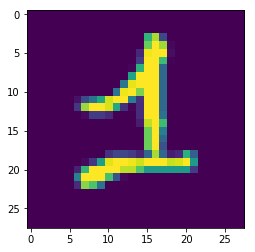

In [5]:
# Looking at sample images
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[24])

In [0]:
# Defining shape of the sets
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Scaling down pixel values from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# Inspecting labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# Inspectingt the categorized labels
Y_train[20:30]


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [4]:
# Building the infrastructure
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, activation='relu', input_shape=(28,28,1), name = "C3-1")) #26
model.add(Convolution2D(32, 3, activation='relu', name = "C3-2")) #24

model.add(Convolution2D(16, 1, activation='relu', name = "C1-1")) #24
model.add(Convolution2D(32, 3, activation='relu', name = "C3-3")) #22

model.add(Convolution2D(10, 1, activation='relu', name = "C1-2")) #22
model.add(Convolution2D(10, 3, activation='relu', name = "C3-4")) #20

model.add(Convolution2D(10, 20, name = "C20-1")) #1
model.add(Flatten(name = "F"))
model.add(Activation('softmax'))

# Checking the model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C3-1 (Conv2D)                (None, 26, 26, 16)        160       
_________________________________________________________________
C3-2 (Conv2D)                (None, 24, 24, 32)        4640      
_________________________________________________________________
C1-1 (Conv2D)                (None, 24, 24, 16)        528       
_________________________________________________________________
C3-3 (Conv2D)                (None, 22, 22, 32)        4640      
_________________________________________________________________
C1-2 (Conv2D)                (None, 22, 22, 10)        330       
_________________________________________________________________
C3-4 (Conv2D)                (None, 20, 20, 10)        910       
_________________________________________________________________
C20-

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
#early_stopper = EarlyStopping(min_delta=0.001, patience=10)
csv_logger = CSVLogger('/content/gdrive/My Drive/EVA/P3/Try2/mnist.csv')

filepath="/content/gdrive/My Drive/EVA/P3/Try2/Iter1 - Best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [29]:
# Training the model
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[csv_logger, checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.1726 - acc: 0.9490 - val_loss: 0.0571 - val_acc: 0.9813

Epoch 00001: val_acc improved from -inf to 0.98130, saving model to /content/gdrive/My Drive/EVA/P3/Try2/Iter1 - Best.hdf5
Epoch 2/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0626 - acc: 0.9814 - val_loss: 0.0510 - val_acc: 0.9837

Epoch 00002: val_acc improved from 0.98130 to 0.98370, saving model to /content/gdrive/My Drive/EVA/P3/Try2/Iter1 - Best.hdf5
Epoch 3/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0495 - val_acc: 0.9844

Epoch 00003: val_acc improved from 0.98370 to 0.98440, saving model to /content/gdrive/My Drive/EVA/P3/Try2/Iter1 - Best.hdf5
Epoch 4/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0375 - acc: 0.9875 - val_loss: 0.0586 - val_acc: 0.9821

Epoch 00004: va

In [0]:
# Loading best model from the initial training
model.load_weights("/content/gdrive/My Drive/EVA/P3/Try2/Iter1 - Best.hdf5")

In [0]:
# Evaluating the model on the test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [34]:
# Printing test score
print(score)

[0.043323928912718836, 0.9873]
